1) Se debe diseñar un filtro pasaaltos , que presente máxima planicidad en la banda de paso (frecuencia de corte = 300Hz)  y un cero  de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:

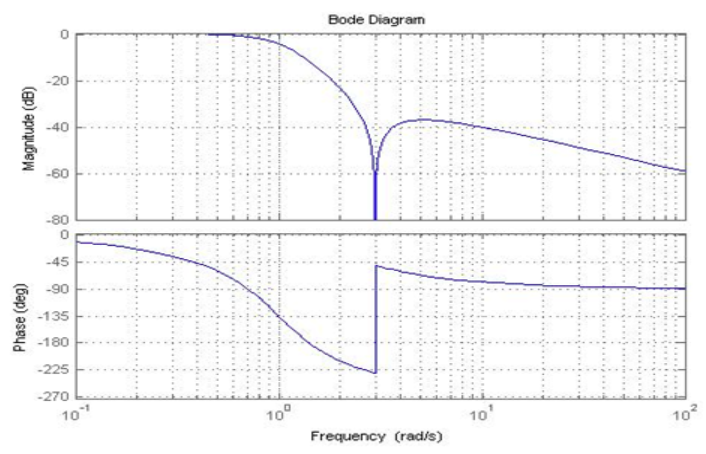

In [4]:
from IPython.display import Image
Image(filename='img/TRANSFERENCIAENUNCIADO18.PNG') 

A) Determine la expresión de H(s) del filtro pasaltos normalizado                    
B) Realizar el diagrama de polos y ceros de H(s)                                             
C) Sintetice el circuito del filtro pedido con una estructura de segundo orden en cascada con una de primer orden ( ambas activas)                                                                                                          

       Se utilizará para la estructura de segundo orden el siguiente circuito:

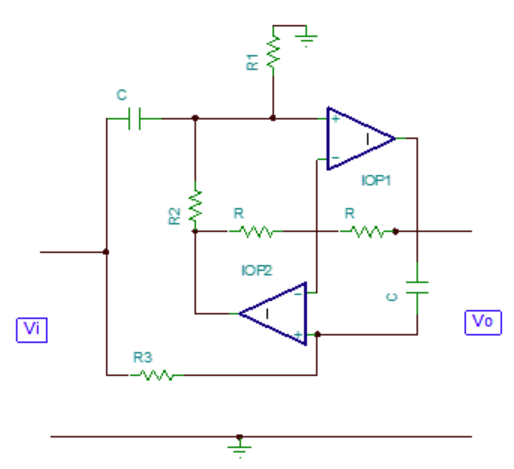

In [5]:
from IPython.display import Image
Image(filename='img/TOPOLOGIAENUNCIADO.PNG') 

Primero tendré que normalizar a un filtro pasabajos prototipo. Donde tendré un cero complejo y conjugado en w = 3 como se observa en la imagen 1 de transferencia solicitada. Luego para maxima planicidad tendré 3 polos sobre la circunferencia de radio unitario.

\begin{equation}
H(s)=\frac{S^2 + 9}{s^3+2·s^2 + 2·s + 1}
\end{equation}

En donde la trasferencia será similar a la siguiente:

C:\Users\Independencia\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)
C:\Users\Independencia\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


Poles: [-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]
Zeros: [-0.+3.j  0.-3.j]


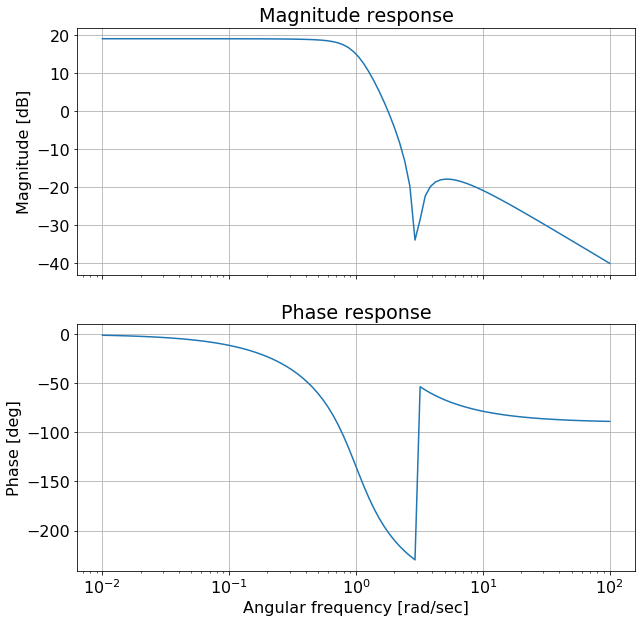

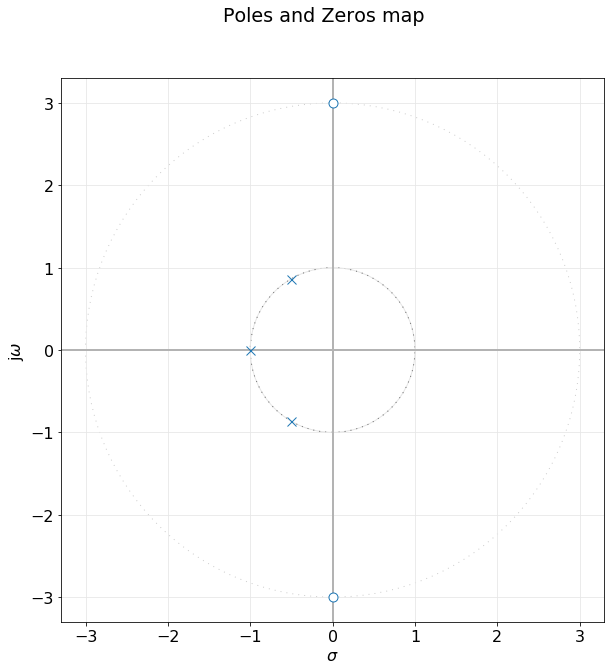

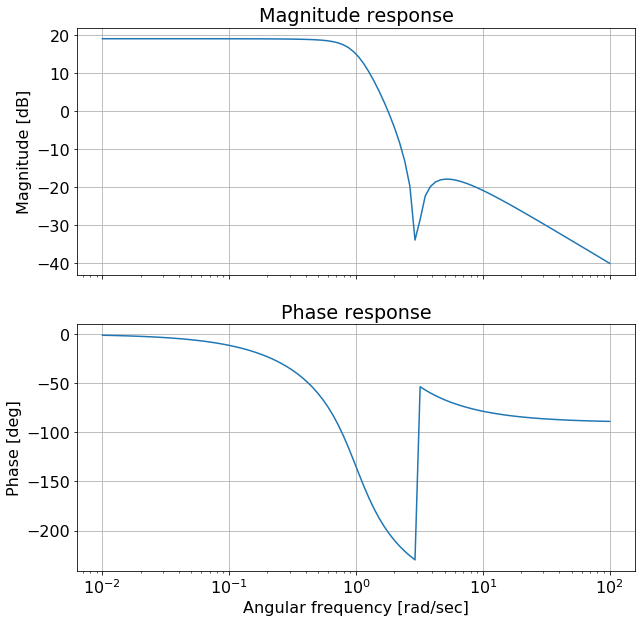

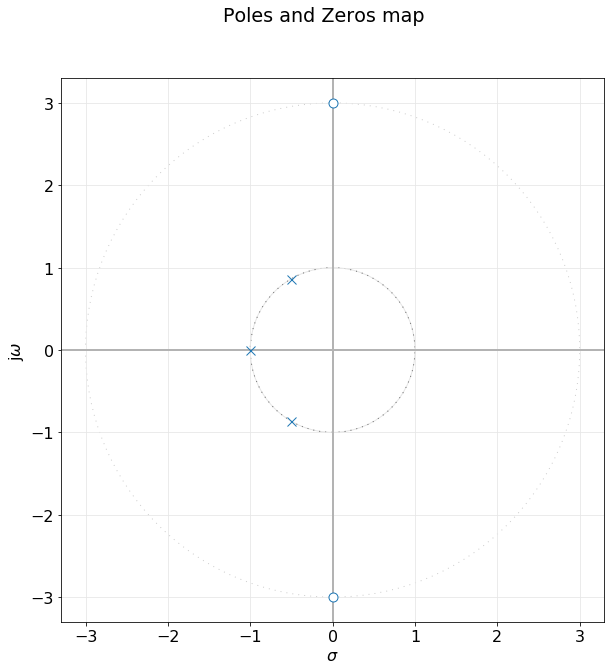

In [18]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
num = ([0., 1., 0., 9.])
den =([1., 2., 2., 1.])

#num,den = sig.lp2hp(num,den,W0)

myFilter = sig.TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)

bodePlot(myFilter)

pzmap(myFilter) #S plane pole/zero plot


H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()

Luego aplico la siguiente trasformacion:
\begin{equation}
H_{pa}(s)=H_{pb}(s)|_{s=1/s}=9·\frac{S^3 + \frac{1}{9}·s}{s^3+2·s^2 + 2·s + 1}
\end{equation}

Poles: [-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]
Zeros: [-0.+0.33333333j  0.-0.33333333j  0.+0.j        ]


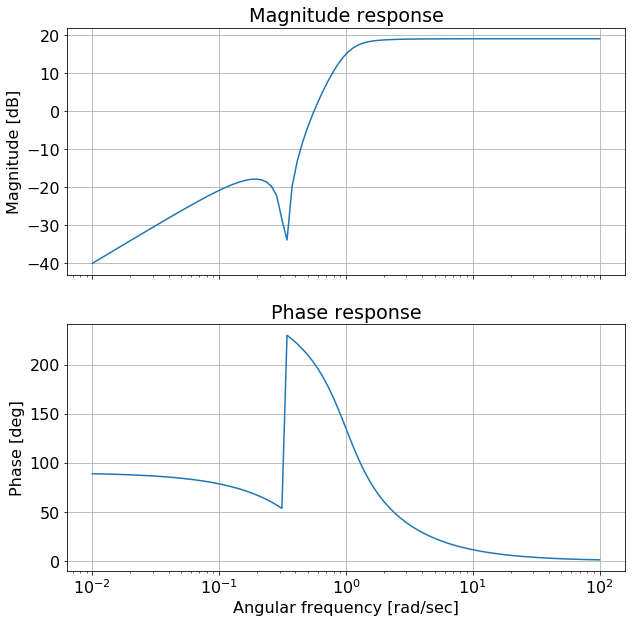

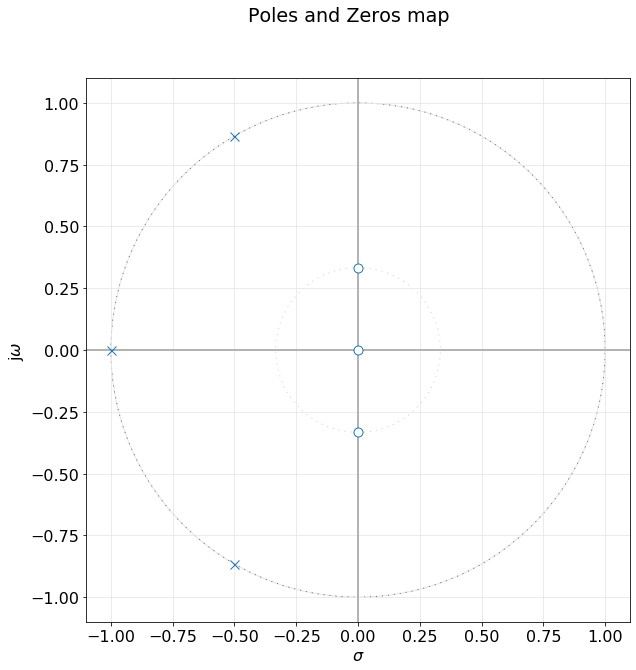

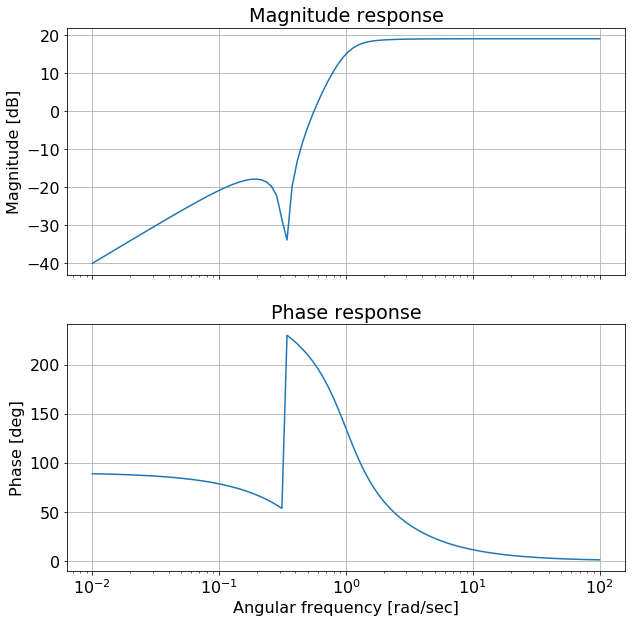

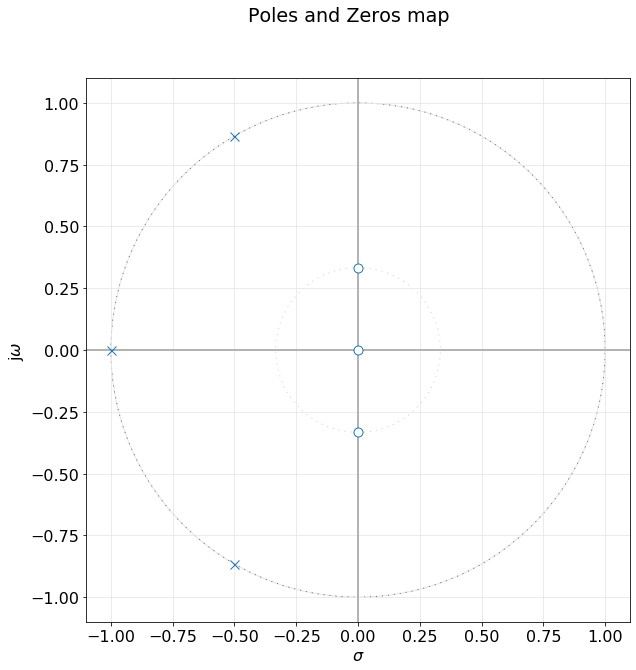

In [15]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
num = ([9., 0., 1., 0.])
den =([1., 2., 2., 1.])

#num,den = sig.lp2hp(num,den,W0)

myFilter = sig.TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)

bodePlot(myFilter)

pzmap(myFilter) #S plane pole/zero plot


H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()

Obtenemos la transferecia para el circuito de segundo orden propuesto donde:
\begin{equation}
\frac{V_o}{V_i}=\frac{S^2·C^2 + G·G_2-G·G_3}{s^2·C^2+G·C·s+G_2·G_3}
\end{equation}
Donde propongo:
\begin{equation}
C=1;G=1
\end{equation}
Obteniendo:
\begin{equation}
\frac{V_o}{V_i}=\frac{S^2 + (G_2-G_3)}{s^2+s+G_2·G_3}
\end{equation}
Y despejando los valores restantes obtenemos:
\begin{equation}
G_2=1.056;G_3=0.945
\end{equation}
La ganancia de 9 veces la vamos a aplicar en la etapa de 1er grado. se tratará de un circuito pasa-altos no inversor con ganancia de 9 veces.
Desnormalizamos para una impedancia de 1kOhm y para la frecuencia de 300Hz. dando como resultado el siguiente circuito con su transferencia.

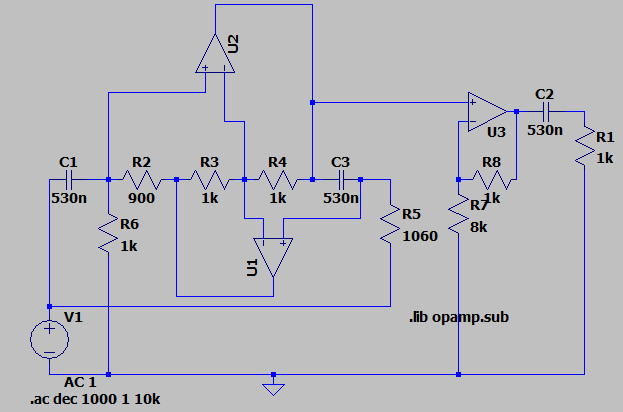

In [20]:
from IPython.display import Image
Image(filename='img/Circuitofinal18.PNG') 

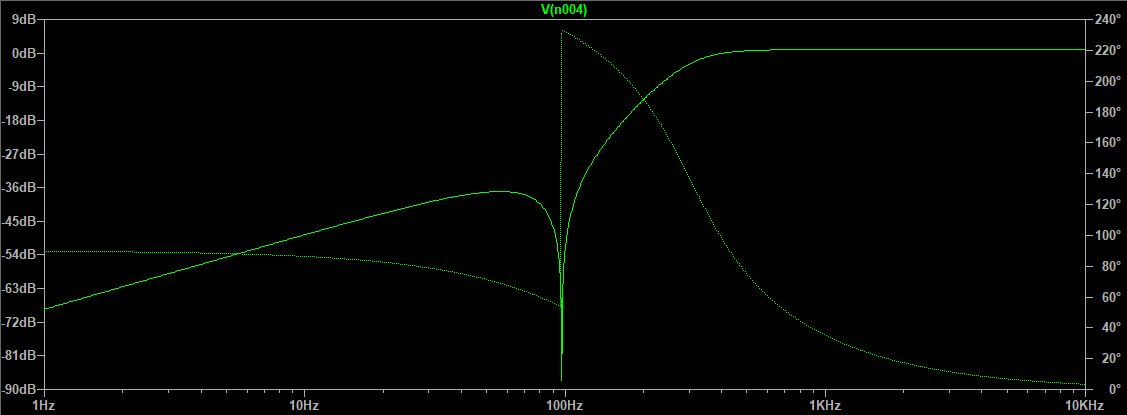

In [21]:
from IPython.display import Image
Image(filename='img/Transferenciafinal18.PNG') 